# 0710012 何權祐 HW5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import re
from io import StringIO

%matplotlib inline

# Data Input
### Create file

In [2]:
data = pd.read_json(r'train.json')
ingredients = []
# file = open('train_temp.csv','w',encoding="utf-8")
for a in data['ingredients']:
    for i in a:
        if i not in ingredients:
            ingredients.append(i)
# array=[]
# for a in data['ingredients']:
#     for i in ingredients:
#         if i not in a:
#             array.append('0')
#         else:
#             array.append('1')
#     file.write((','.join(array)) +'\n')
#     array=[]
    
# file.close()

data_t = pd.read_json(r'test.json')
# file = open('test_temp.csv','w',encoding="utf-8")

# for a in data_t['ingredients']:
#     for i in ingredients:
#         if i not in a:
#             array.append('0')
#         else:
#             array.append('1')
#     file.write((','.join(array)) +'\n')
#     array=[]
# file.close()

### Read from the created file after the first time to save time

In [3]:
num = []
for a in data['ingredients']:
    num.append(len(a))

num=pd.DataFrame(num,columns=['num'])

country_labels= np.unique(np.asanyarray(data['cuisine'].values))

for i in range(len(data['cuisine'].values)):
    data['cuisine'][i]=country_labels.tolist().index(data['cuisine'][i])

data = data.drop(columns=['ingredients','id'])
ing = pd.DataFrame(np.asanyarray(pd.read_csv('train_temp.csv',header=None)),columns=ingredients)
data = pd.concat([data,ing.reindex(data.index)],axis=1)
data = pd.concat([data,num.reindex(data.index)],axis=1)
data

<ipython-input-3-390d43e7a318>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cuisine'][i]=country_labels.tolist().index(data['cuisine'][i])


,cuisine,egg whites,pecans,agave nectar,ground cinnamon,sea salt,large egg whites,whole milk,bread crumb fresh,large eggs,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,num
0,16,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,6,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,11
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
29770,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
29771,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
29772,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


# Data Visualization
### Value count of label

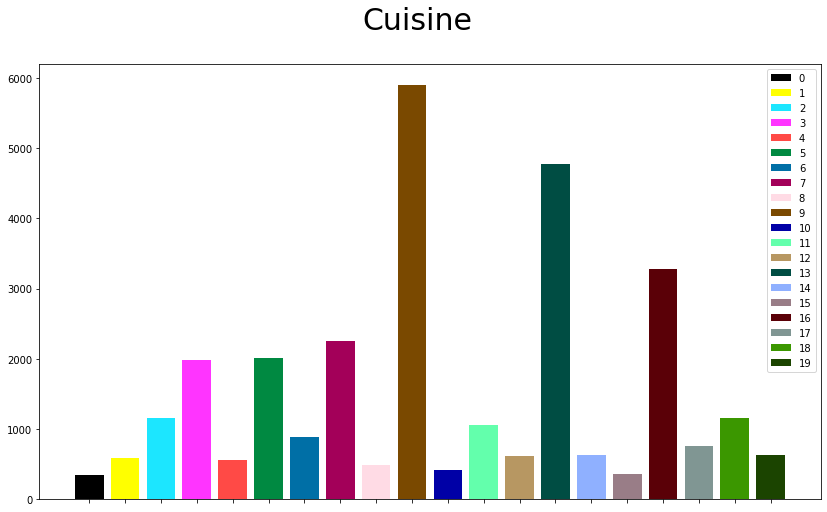

In [4]:
fig1 ,axs1 = plt.subplots(1,1)
fig1.suptitle('Cuisine',fontsize=30)
labels, counts = np.unique(np.asanyarray(data['cuisine'].values), return_counts=True)
c=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#3B9700", "#1B4400"]
a=axs1.bar(labels,counts,align='center',color=c,tick_label='')
axs1.legend(a,labels)
fig1.set_figheight(8)
fig1.set_figwidth(14)
plt.show()

### Value count of top 30 features

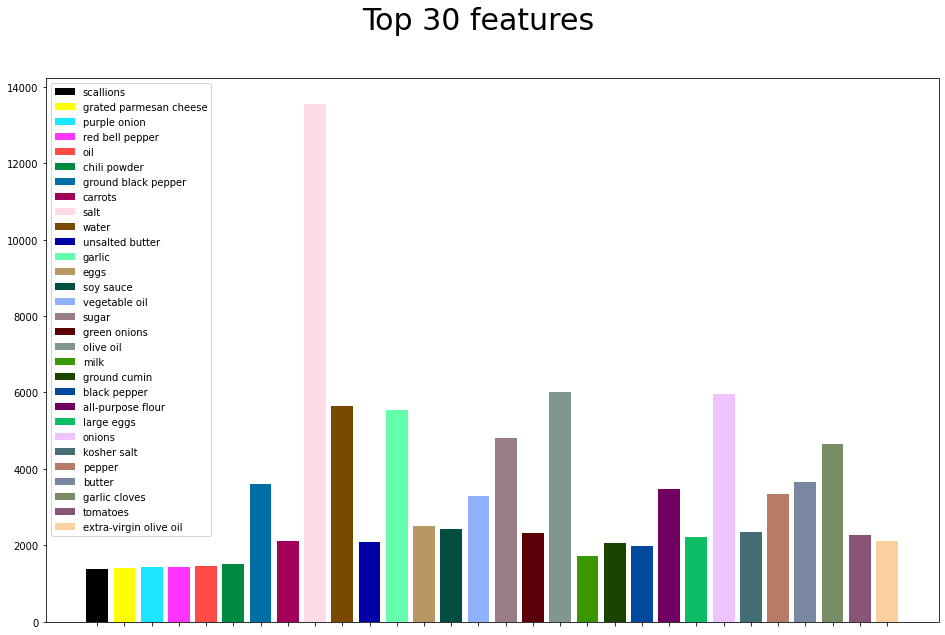

In [5]:
ingredients = ing.keys()
temp = []
for i in ingredients:
    labels, counts = np.unique(ing[i], return_counts=True)
    temp.append(counts[1])
ind = np.argpartition(temp, -30)[-30:]
# print(ind)

ticks = ingredients[ind]
n = np.asanyarray(temp)[ind]

fig2 ,axs2 = plt.subplots(1,1)
fig2.suptitle('Top 30 features',fontsize=30)
c=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#3B9700", "#1B4400","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", 
    "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F"]
a=axs2.bar(ticks,n,align='center',color=c,tick_label='')
axs2.legend(a,ticks)
fig2.set_figheight(10)
fig2.set_figwidth(16)
# print(labels.astype(str))
plt.show()

### Value count of num of ingredients

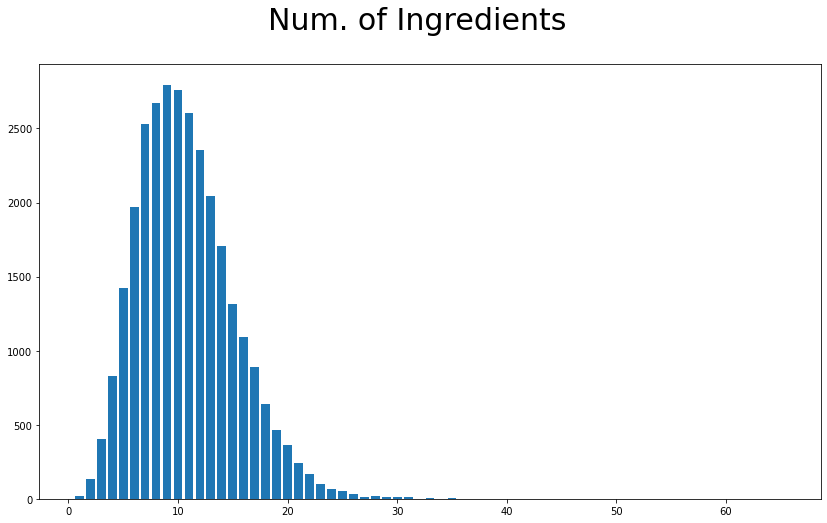

In [6]:
fig3 ,axs3 = plt.subplots(1,1)
fig3.suptitle('Num. of Ingredients',fontsize=30)
labels, counts = np.unique(np.asanyarray(data['num'].values), return_counts=True)
a=axs3.bar(labels,counts,align='center')
# axs1.legend(a,labels)
fig3.set_figheight(8)
fig3.set_figwidth(14)
# print(labels.astype(str))
plt.show()

# Data Processing

In [7]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)
Label = data['cuisine']
feature = data.drop(columns='cuisine')
feature

,egg whites,pecans,agave nectar,ground cinnamon,sea salt,large egg whites,whole milk,bread crumb fresh,large eggs,lemon wedge,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,num
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
29770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
29771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
29772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


# Artificial Neural Networks
I choose to use the sequential model in tensorflow, and build up a 3-layer model with 6214 inputs, with first layer being linear while having 256 neural, second layer being relu while having 65 neural, and the last layer being softmax while having 20(output) neural, which only change the value into percentage. The reason why I have a mixture of layer is that different layers has their upside and downside; therefore, if we blend them together well, the outcome should be very pleasing.

In [8]:
import tensorflow as tf
model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(tf.keras.layers.Dense(256, activation="linear", input_shape=(6214, )))
# Add another:
model.add(tf.keras.layers.Dense(64, activation="relu"))
# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(20, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.01),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=[tf.keras.metrics.categorical_accuracy])

# Validation Method

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature.values,Label.values.ravel(),train_size=0.7)
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
model.fit(X_train, y_train, batch_size = 256, epochs = 30, verbose = 1) 
print(type(X_train[0][0]))
# y_test = tf.keras.utils.to_categorical(y_test)


(20841, 20)
Epoch 1/30
82/82 [==============================] - 3s 23ms/step - loss: 1.3350 - categorical_accuracy: 0.6365
Epoch 2/30
82/82 [==============================] - 2s 24ms/step - loss: 0.7014 - categorical_accuracy: 0.7884
Epoch 3/30
82/82 [==============================] - 2s 24ms/step - loss: 0.5177 - categorical_accuracy: 0.8376
Epoch 4/30
82/82 [==============================] - 2s 24ms/step - loss: 0.4163 - categorical_accuracy: 0.8701
Epoch 5/30
82/82 [==============================] - 2s 24ms/step - loss: 0.3305 - categorical_accuracy: 0.8970
Epoch 6/30
82/82 [==============================] - 2s 24ms/step - loss: 0.2590 - categorical_accuracy: 0.9181
Epoch 7/30
82/82 [==============================] - 2s 24ms/step - loss: 0.2145 - categorical_accuracy: 0.9316
Epoch 8/30
82/82 [==============================] - 2s 24ms/step - loss: 0.1817 - categorical_accuracy: 0.9412
Epoch 9/30
82/82 [==============================] - 2s 24ms/step - loss: 0.1537 - categorical_accura

# Results 
labels = 
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tabulate import tabulate

predict_mat = model.predict(X_test)
predict=predict_mat.argmax(axis=1)
count=0
for i in range(len(y_test)):
    if predict[i] != y_test[i]:
        count+=1

print('Accuracy:')
print((1-count/len(y_test))*100, '%')
print('\nPrecision:')
print(precision_score(np.uint32(y_test),np.uint32(predict),average=None,labels=np.arange(20)))
print('\nRecall(Sensitivity):')
print(recall_score(np.uint32(y_test),np.uint32(predict),average=None,labels=np.arange(20)))

Accuracy:
71.42057539460427 %

Precision:
[0.7037037  0.42       0.50383142 0.72669826 0.56122449 0.562249
 0.71300448 0.78066914 0.55319149 0.84610473 0.74509804 0.81526104
 0.83783784 0.84093872 0.64788732 0.36363636 0.69022869 0.3404908
 0.64963504 0.60504202]

Recall(Sensitivity):
[0.4351145  0.34615385 0.73259053 0.81850534 0.56994819 0.4886562
 0.62109375 0.91304348 0.29545455 0.76856148 0.66666667 0.63239875
 0.62626263 0.89707928 0.75       0.43902439 0.66800805 0.5
 0.77391304 0.38095238]


In [11]:
print('\nConfusion_matrix:')
pd.DataFrame(confusion_matrix(np.uint32(y_test),np.uint32(predict),labels=np.arange(20)))


Confusion_matrix:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,57,3,4,0,3,1,0,7,0,2,2,0,0,27,0,1,7,6,10,1
1,0,63,6,1,3,19,4,5,15,14,2,2,0,7,1,6,33,1,0,0
2,0,3,263,2,0,7,0,4,0,12,1,0,1,12,1,3,42,7,1,0
3,0,0,3,460,12,0,1,10,1,1,0,9,7,5,1,1,9,2,27,13
4,2,1,2,16,110,1,0,4,0,6,4,2,1,6,1,2,9,4,17,5
5,5,16,16,3,2,280,5,8,10,88,0,3,0,24,7,15,57,32,1,1
6,0,1,4,1,0,7,159,12,1,35,0,0,0,5,12,0,8,10,1,0
7,2,2,0,3,0,5,5,630,0,1,1,4,1,8,13,2,3,1,9,0
8,1,24,11,0,0,16,2,6,52,9,1,0,1,7,0,7,35,4,0,0
9,1,6,47,9,7,92,28,13,3,1325,0,4,3,37,10,9,44,84,1,1


# Comparison & Conclusion
Actually ar first my tf model was a mixture of linear, relu, and sigmoid. However, I found out that whenever I apply sigmoid layer as the last layer, the output always has the same prediction over all different cases, as well as the values are all the same. As long as I change the last layer, the result became normal again. I think that the side where sigmoid model approach to 0 may have filter out the essential signal of the output, resulting in such abnormal outcome.

# Kaggle Submission

In [12]:
y_train = tf.keras.utils.to_categorical(Label.values.ravel())
model.fit(feature.values,y_train, batch_size = 256, epochs = 50, verbose = 1)

Epoch 1/50
117/117 [==============================] - 3s 26ms/step - loss: 1.0952 - categorical_accuracy: 0.8098
Epoch 2/50
117/117 [==============================] - 2s 20ms/step - loss: 0.6148 - categorical_accuracy: 0.8565
Epoch 3/50
117/117 [==============================] - 3s 22ms/step - loss: 0.4613 - categorical_accuracy: 0.8842
Epoch 4/50
117/117 [==============================] - 3s 23ms/step - loss: 0.3795 - categorical_accuracy: 0.9012
Epoch 5/50
117/117 [==============================] - 3s 23ms/step - loss: 0.3311 - categorical_accuracy: 0.9122
Epoch 6/50
117/117 [==============================] - 2s 20ms/step - loss: 0.2889 - categorical_accuracy: 0.9208
Epoch 7/50
117/117 [==============================] - 2s 21ms/step - loss: 0.2568 - categorical_accuracy: 0.9298
Epoch 8/50
117/117 [==============================] - 3s 22ms/step - loss: 0.2426 - categorical_accuracy: 0.9352
Epoch 9/50
117/117 [==============================] - 2s 20ms/step - loss: 0.2311 - categorical_

In [13]:
data_t = pd.read_json(r'test.json')
num_t = []
for a in data_t['ingredients']:
    num_t.append(len(a))

num_t=pd.DataFrame(num_t,columns=['num'])

data_t = data_t.drop(columns=['ingredients','id'])
ing_t = pd.DataFrame(np.asanyarray(pd.read_csv('test_temp.csv',header=None)),columns=ingredients)
data_t = pd.concat([data_t,ing_t.reindex(data_t.index)],axis=1)
data_t = pd.concat([data_t,num_t.reindex(data_t.index)],axis=1)
data_t

,egg whites,pecans,agave nectar,ground cinnamon,sea salt,large egg whites,whole milk,bread crumb fresh,large eggs,lemon wedge,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,num
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [14]:
predict = model.predict(data_t.values)
print(predict)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0065832e-34 0.0000000e+00 0.0000000e+00 ... 2.1923156e-19
  4.8417016e-13 1.1210030e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [15]:
temp = pd.read_json(r'test.json')
max_index=predict.argmax(axis=1)
file=open('submission.csv','w',encoding="utf-8")
file.write('id,Category\n')
for i in range(10000):
    file.write(str(temp['id'][i])+','+country_labels[max_index[i]])
    file.write('\n')
file.close()